### Q-2. 
Imagine you have a dataset where you have different features like Age , Gender , Height , Weight , BMI , and Blood Pressure and you have to classify the people into different classes like Normal , Overweight , Obesity , Underweight , and Extreme Obesity by using any 4 different classification algorithms. Now you have to build a model which can classify people into different classes.

Dataset:https://www.kaggle.com/datasets/ankurbajaj9/obesity-levels?resource=download

In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline  
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load the dataset
df = pd.read_csv(r"D:\DATA SCIENCE\FSDS - May 22\Ineuron_Placement_Assessment\3. ML\ObesityData.csv")

In [3]:
# Display first 5 records of the data
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [4]:
# Display last 5 records of the data
df.tail()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III
2110,Female,23.664709,1.738836,133.472641,yes,yes,3.0,3.0,Sometimes,no,2.863513,no,1.026452,0.714137,Sometimes,Public_Transportation,Obesity_Type_III


In [5]:
# Check info of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

In [6]:
# Checking shape of the data
df.shape

(2111, 17)

In [7]:
# Statistical Summary
df.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


In [8]:
# Statistical Summary for object variable
df.describe(include = 'object')

,Gender,family_history_with_overweight,FAVC,CAEC,SMOKE,SCC,CALC,MTRANS,NObeyesdad
count,2111,2111,2111,2111,2111,2111,2111,2111,2111
unique,2,2,2,4,2,2,4,5,7
top,Male,yes,yes,Sometimes,no,no,Sometimes,Public_Transportation,Obesity_Type_I
freq,1068,1726,1866,1765,2067,2015,1401,1580,351


In [9]:
# Check for null values
df.isnull().sum()

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

<Axes: >

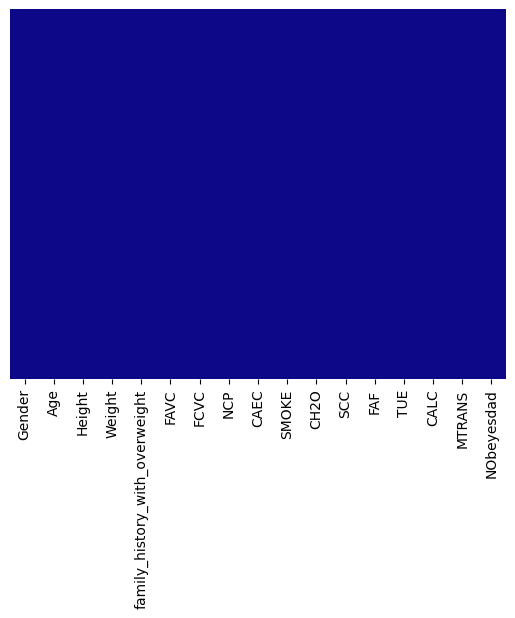

In [10]:
#Check if there are any missing values
sns.heatmap(df.isnull(), cbar=False, yticklabels=False, cmap='plasma')

### we have no missing values in any of the columns

In [11]:
df.columns

Index(['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight',
       'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE',
       'CALC', 'MTRANS', 'NObeyesdad'],
      dtype='object')

In [12]:
# Body fat can be determined by Body Mass Index BMI so we can create column BMI using height and weight
df['BMI'] = df['Weight']/(df['Height']**2)

In [13]:
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad,BMI
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight,24.386526
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight,24.238227
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight,23.765432
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I,26.851852
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II,28.342381


In [14]:
# We can rename some columns for better analysis
df.rename(columns = {'family_history_with_overweight':'family_history','MTRANS':'Transportation',
                    'NObeyesdad':'Obesity'},inplace=True)

In [15]:
df.columns

Index(['Gender', 'Age', 'Height', 'Weight', 'family_history', 'FAVC', 'FCVC',
       'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE', 'CALC',
       'Transportation', 'Obesity', 'BMI'],
      dtype='object')

In [16]:
# Reordering columns
df = df[['Gender','Age','Height','Weight','BMI','family_history','FAVC','FCVC',
       'NCP','CAEC','SMOKE','CH2O','SCC','FAF','TUE','CALC','Transportation','Obesity']]

In [17]:
df.head()

,Gender,Age,Height,Weight,BMI,family_history,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,Transportation,Obesity
0,Female,21.0,1.62,64.0,24.386526,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,24.238227,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,23.765432,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,26.851852,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,28.342381,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [18]:
# Seperating numerical & categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 9 numerical features : ['Age', 'Height', 'Weight', 'BMI', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']

We have 9 categorical features : ['Gender', 'family_history', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'Transportation', 'Obesity']


In [19]:
# count data on categorical columns
for col in categorical_features:
    print(df[col].value_counts())
    print('-------------------------')

Male      1068
Female    1043
Name: Gender, dtype: int64
-------------------------
yes    1726
no      385
Name: family_history, dtype: int64
-------------------------
yes    1866
no      245
Name: FAVC, dtype: int64
-------------------------
Sometimes     1765
Frequently     242
Always          53
no              51
Name: CAEC, dtype: int64
-------------------------
no     2067
yes      44
Name: SMOKE, dtype: int64
-------------------------
no     2015
yes      96
Name: SCC, dtype: int64
-------------------------
Sometimes     1401
no             639
Frequently      70
Always           1
Name: CALC, dtype: int64
-------------------------
Public_Transportation    1580
Automobile                457
Walking                    56
Motorbike                  11
Bike                        7
Name: Transportation, dtype: int64
-------------------------
Obesity_Type_I         351
Obesity_Type_III       324
Obesity_Type_II        297
Overweight_Level_I     290
Overweight_Level_II    290
Normal_

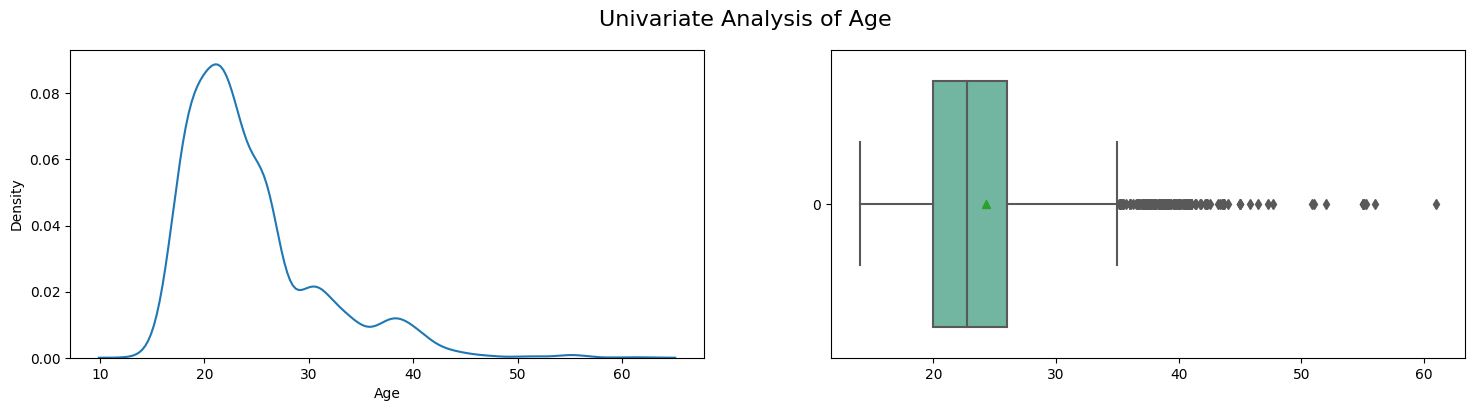

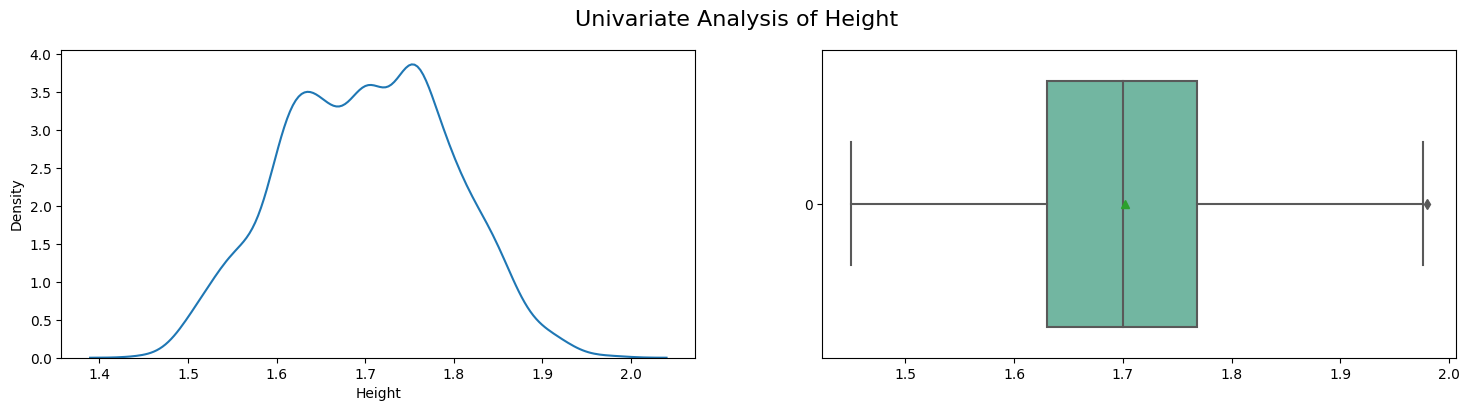

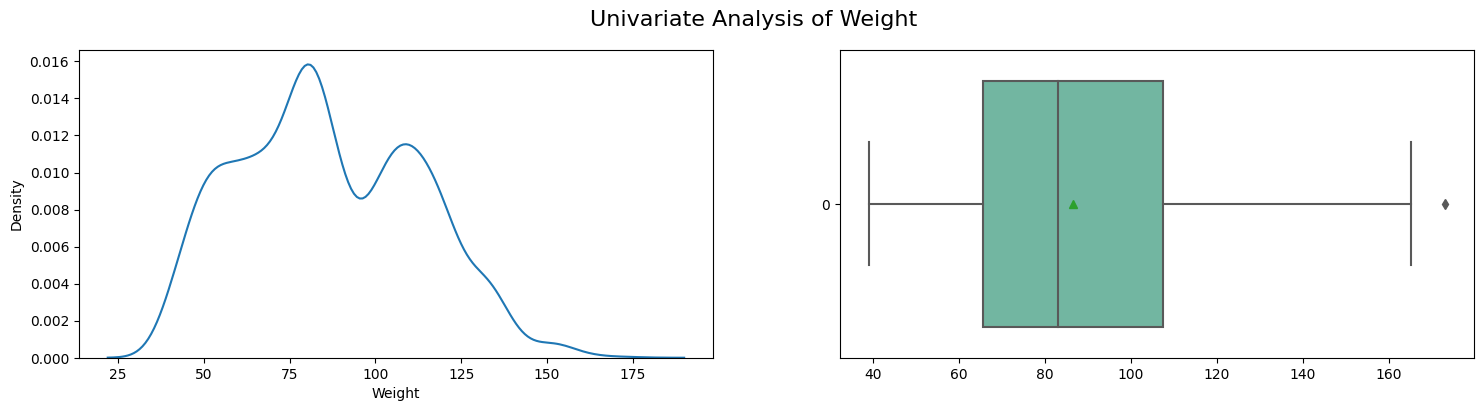

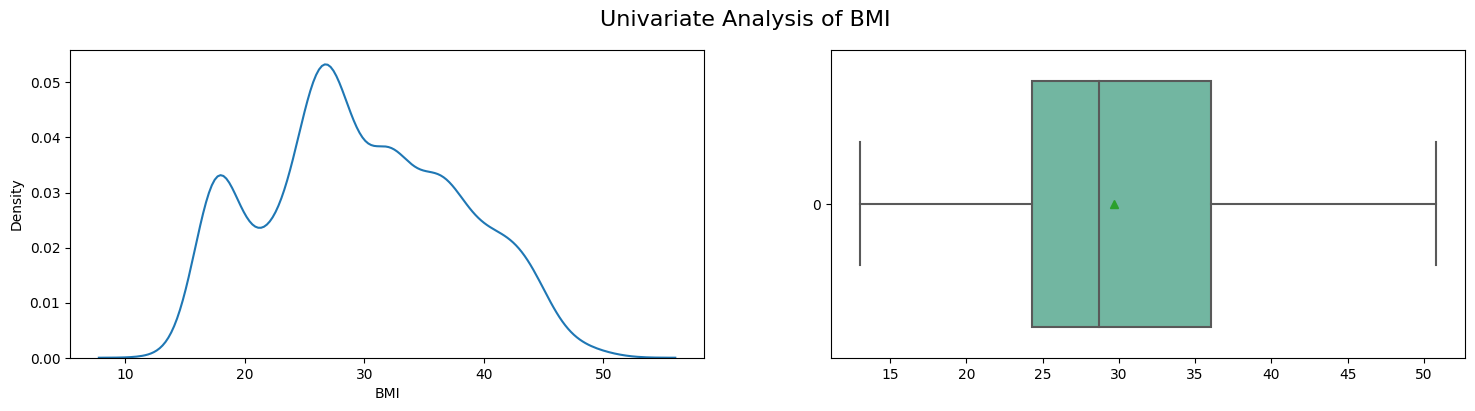

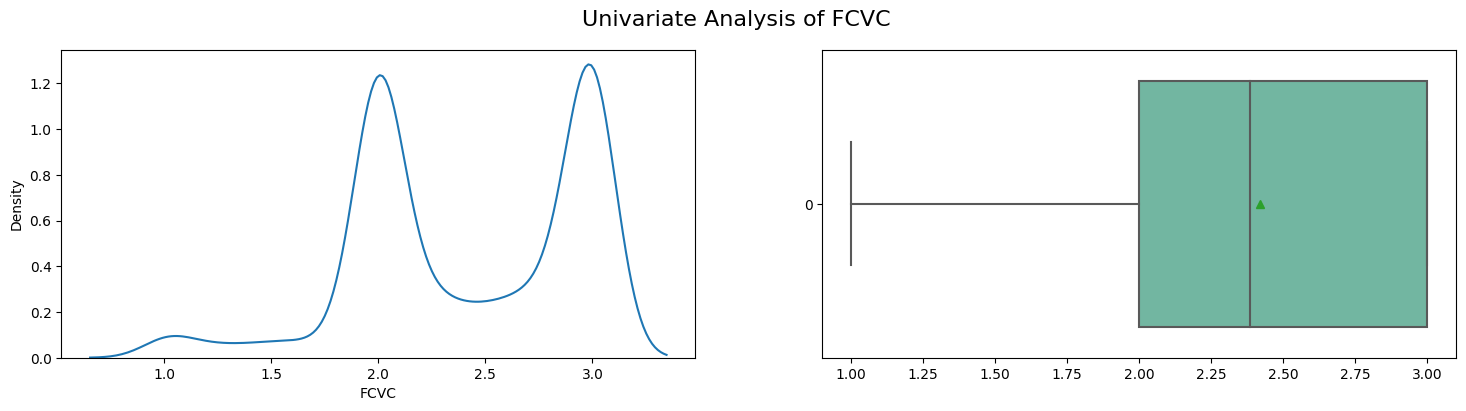

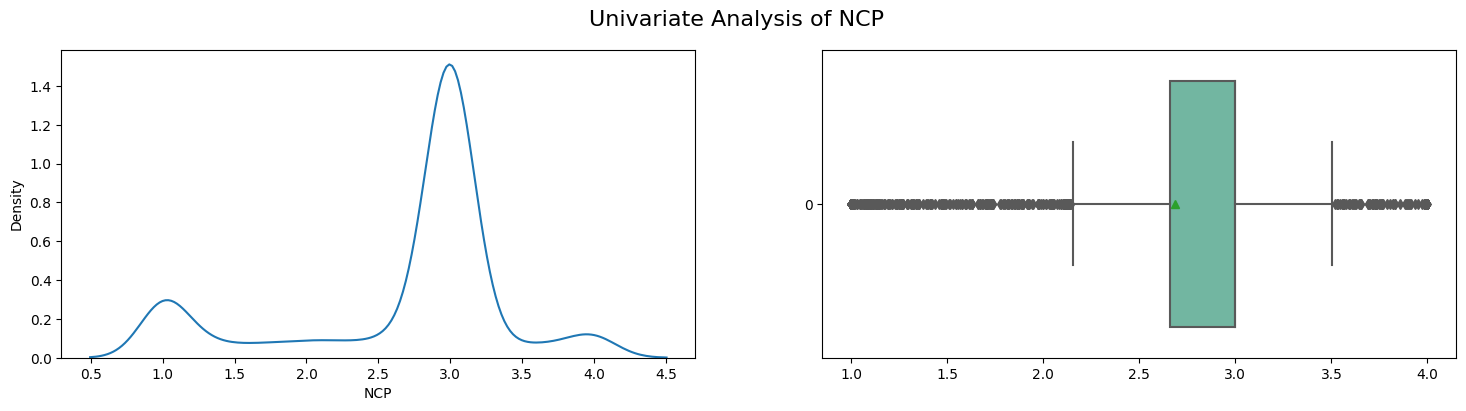

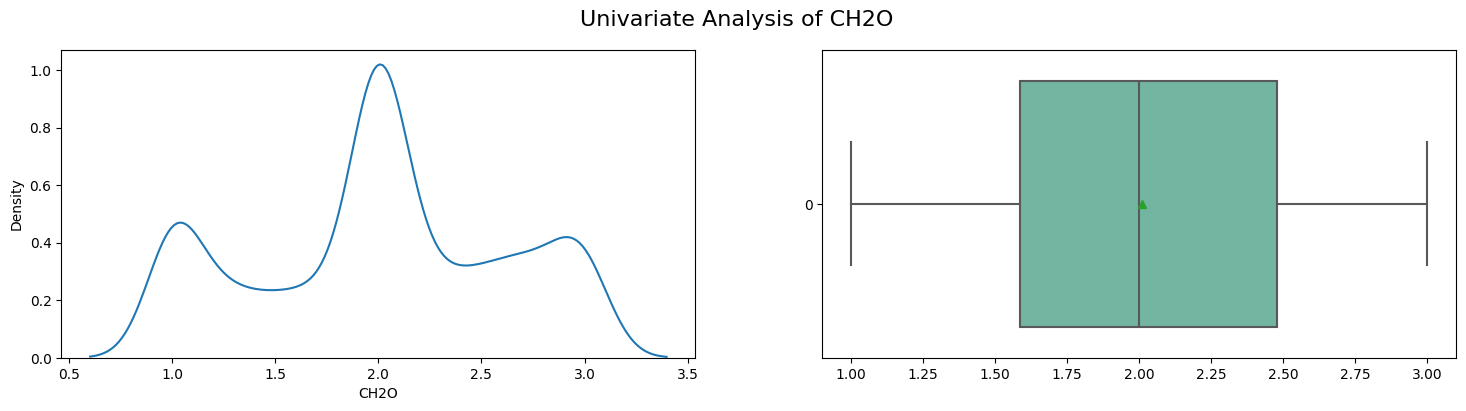

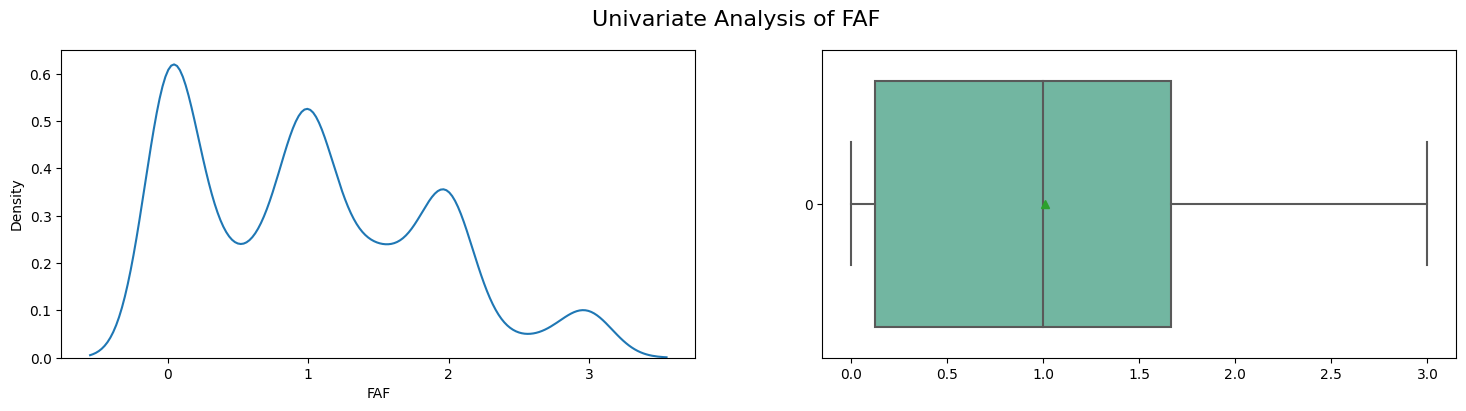

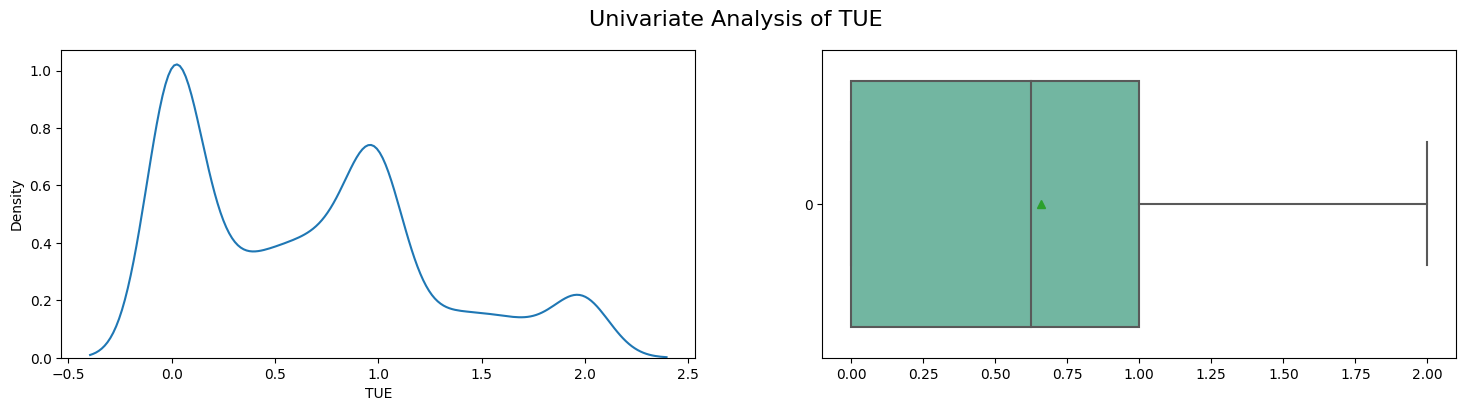

In [20]:
# check the ditribution for the numerical columns
x_axis = numeric_features
for x in x_axis:
    fig, axes = plt.subplots(1, 2, figsize=(18,4))
    sns.distplot(df[x], ax=axes[0], kde = True, hist=False)
    sns.boxplot(df[x], ax=axes[1], orient = "h", showmeans = True,palette="Set2")
    fig.suptitle('Univariate Analysis of ' + x, fontsize=16)

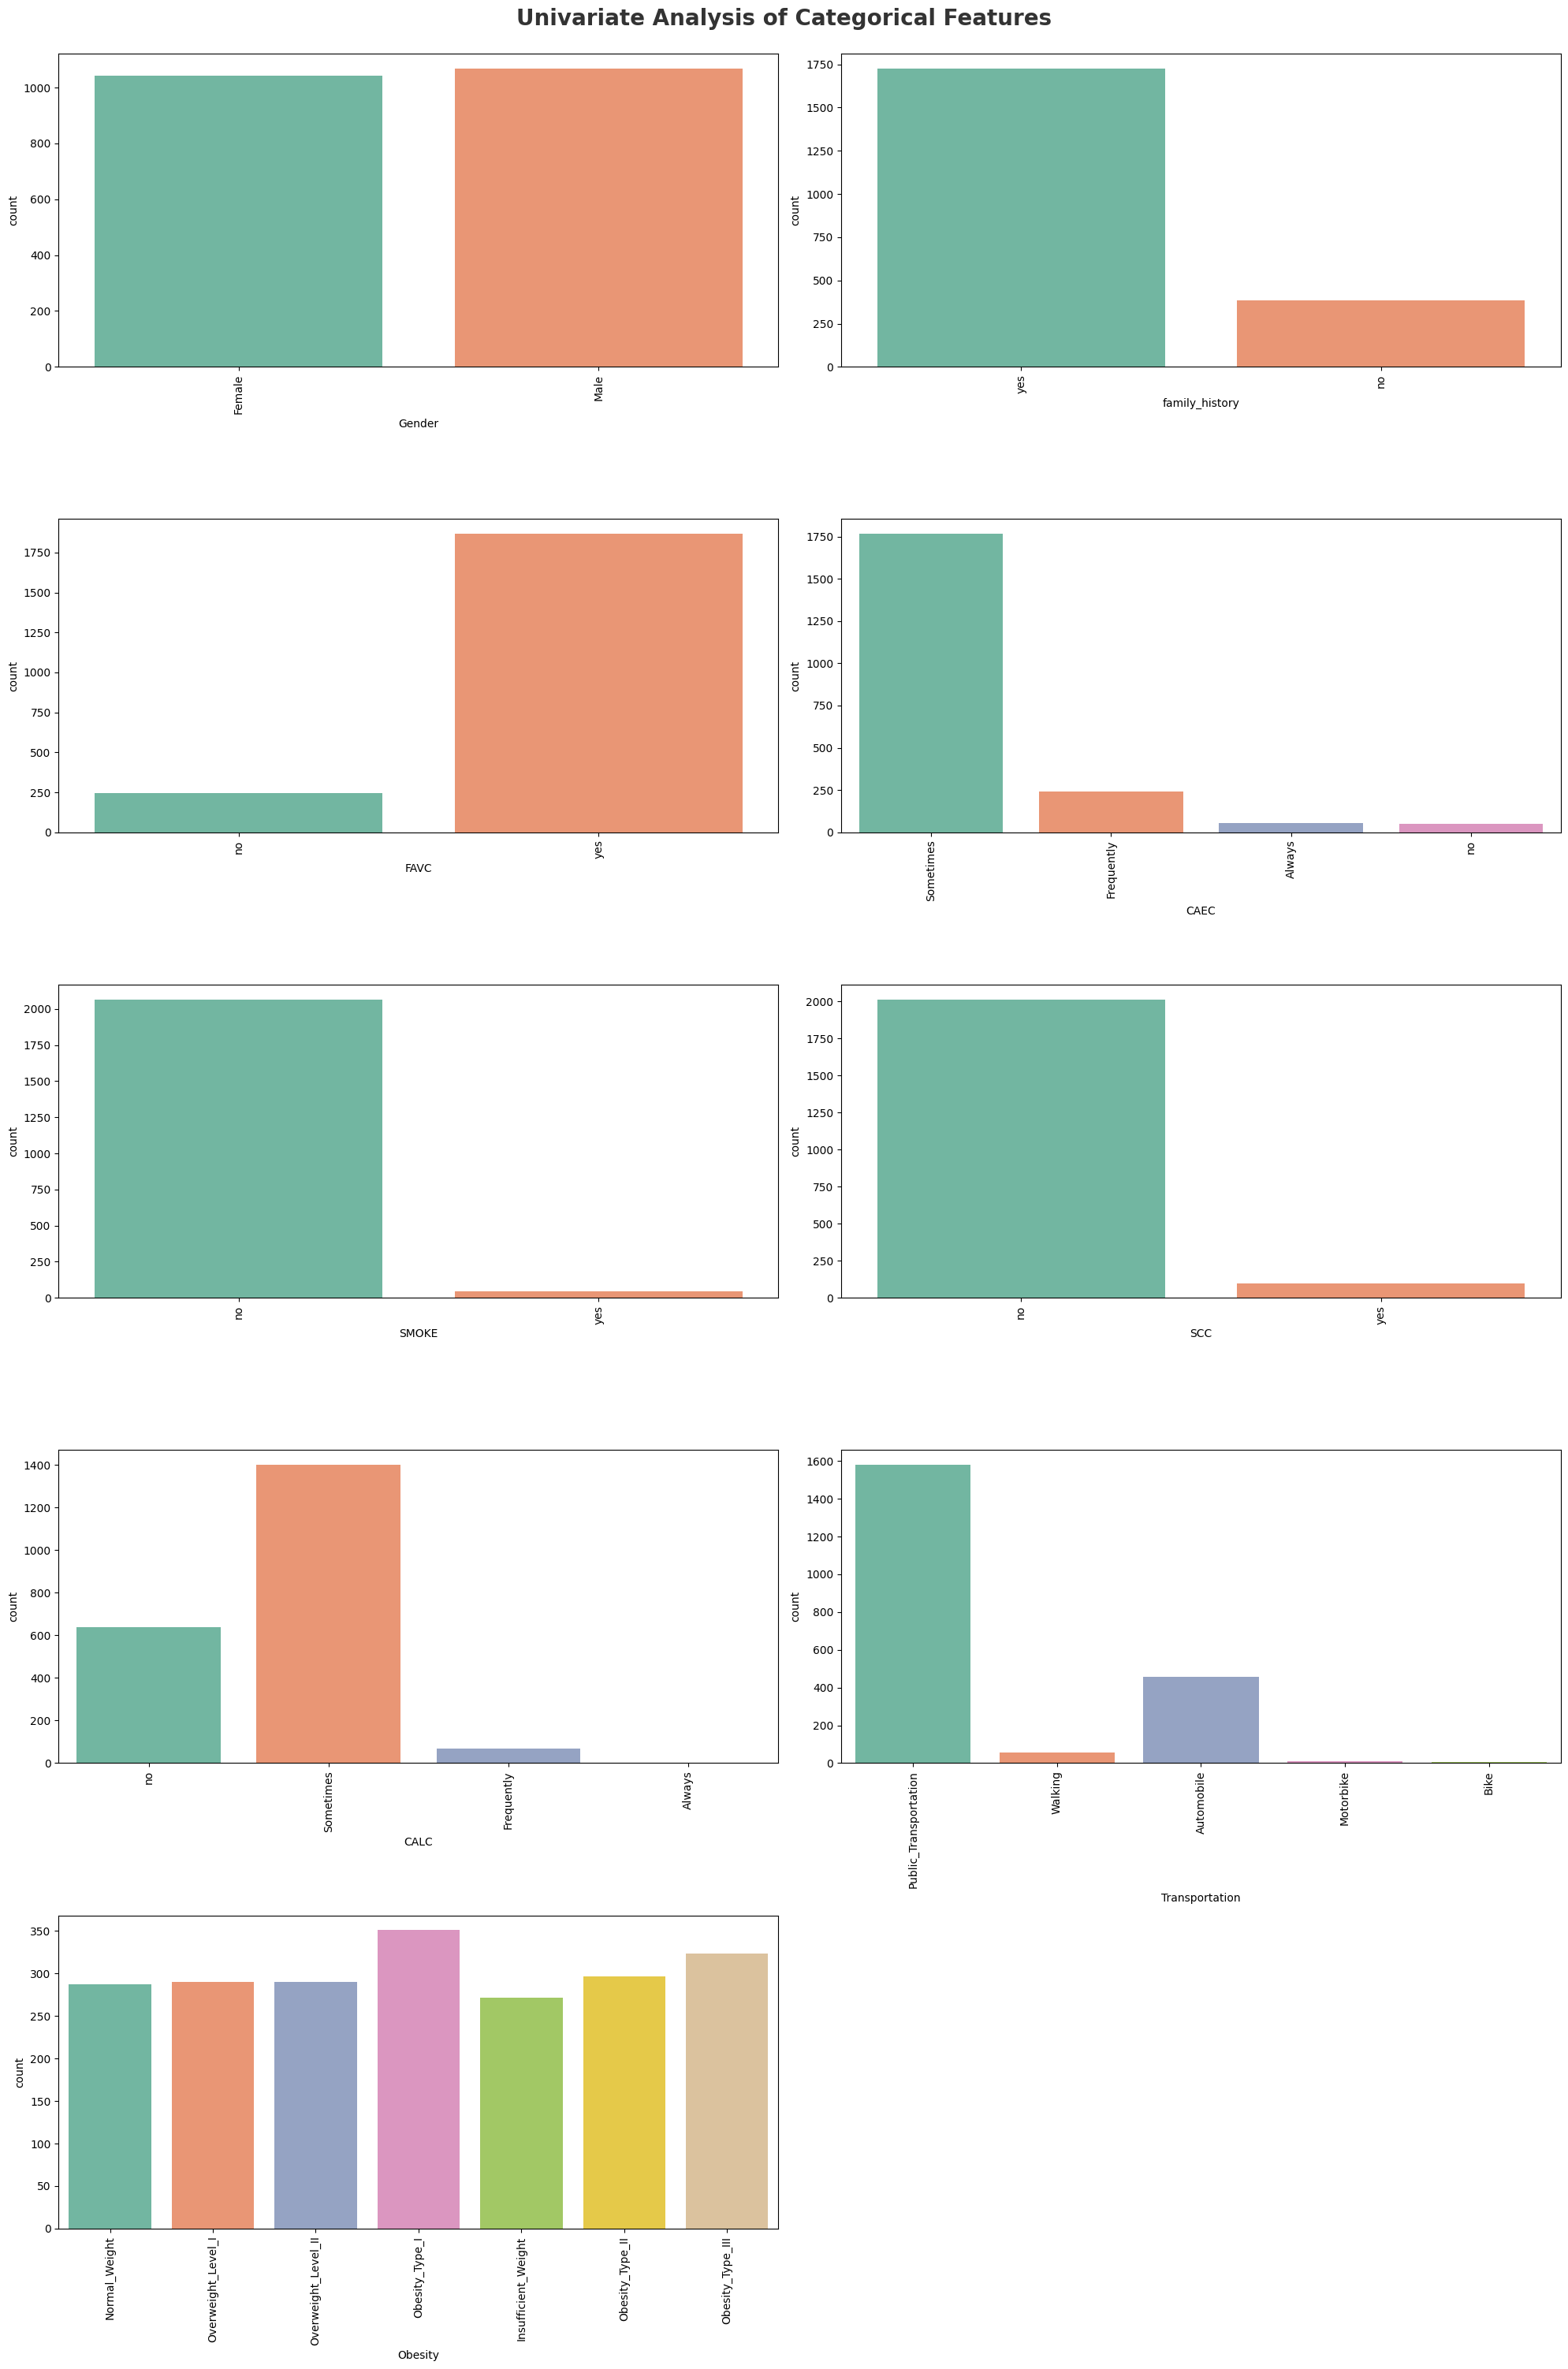

In [21]:
# categorical columns
plt.figure(figsize=(20, 30))
plt.suptitle('Univariate Analysis of Categorical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)
category = ['Gender', 'family_history', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'Transportation', 'Obesity']
for i in range(0, len(category)):
    plt.subplot(5, 2, i+1)
    sns.countplot(x=df[category[i]],palette="Set2")
    plt.xlabel(category[i])
    plt.xticks(rotation=90)
    plt.tight_layout()

In [22]:
#Check how many duplicate rows there are
dup_data = df[df.duplicated()]

In [23]:
dup_data.shape

(24, 18)

In [24]:
#Drop duplicates
data = df.drop_duplicates(keep='last')
data.shape

(2087, 18)

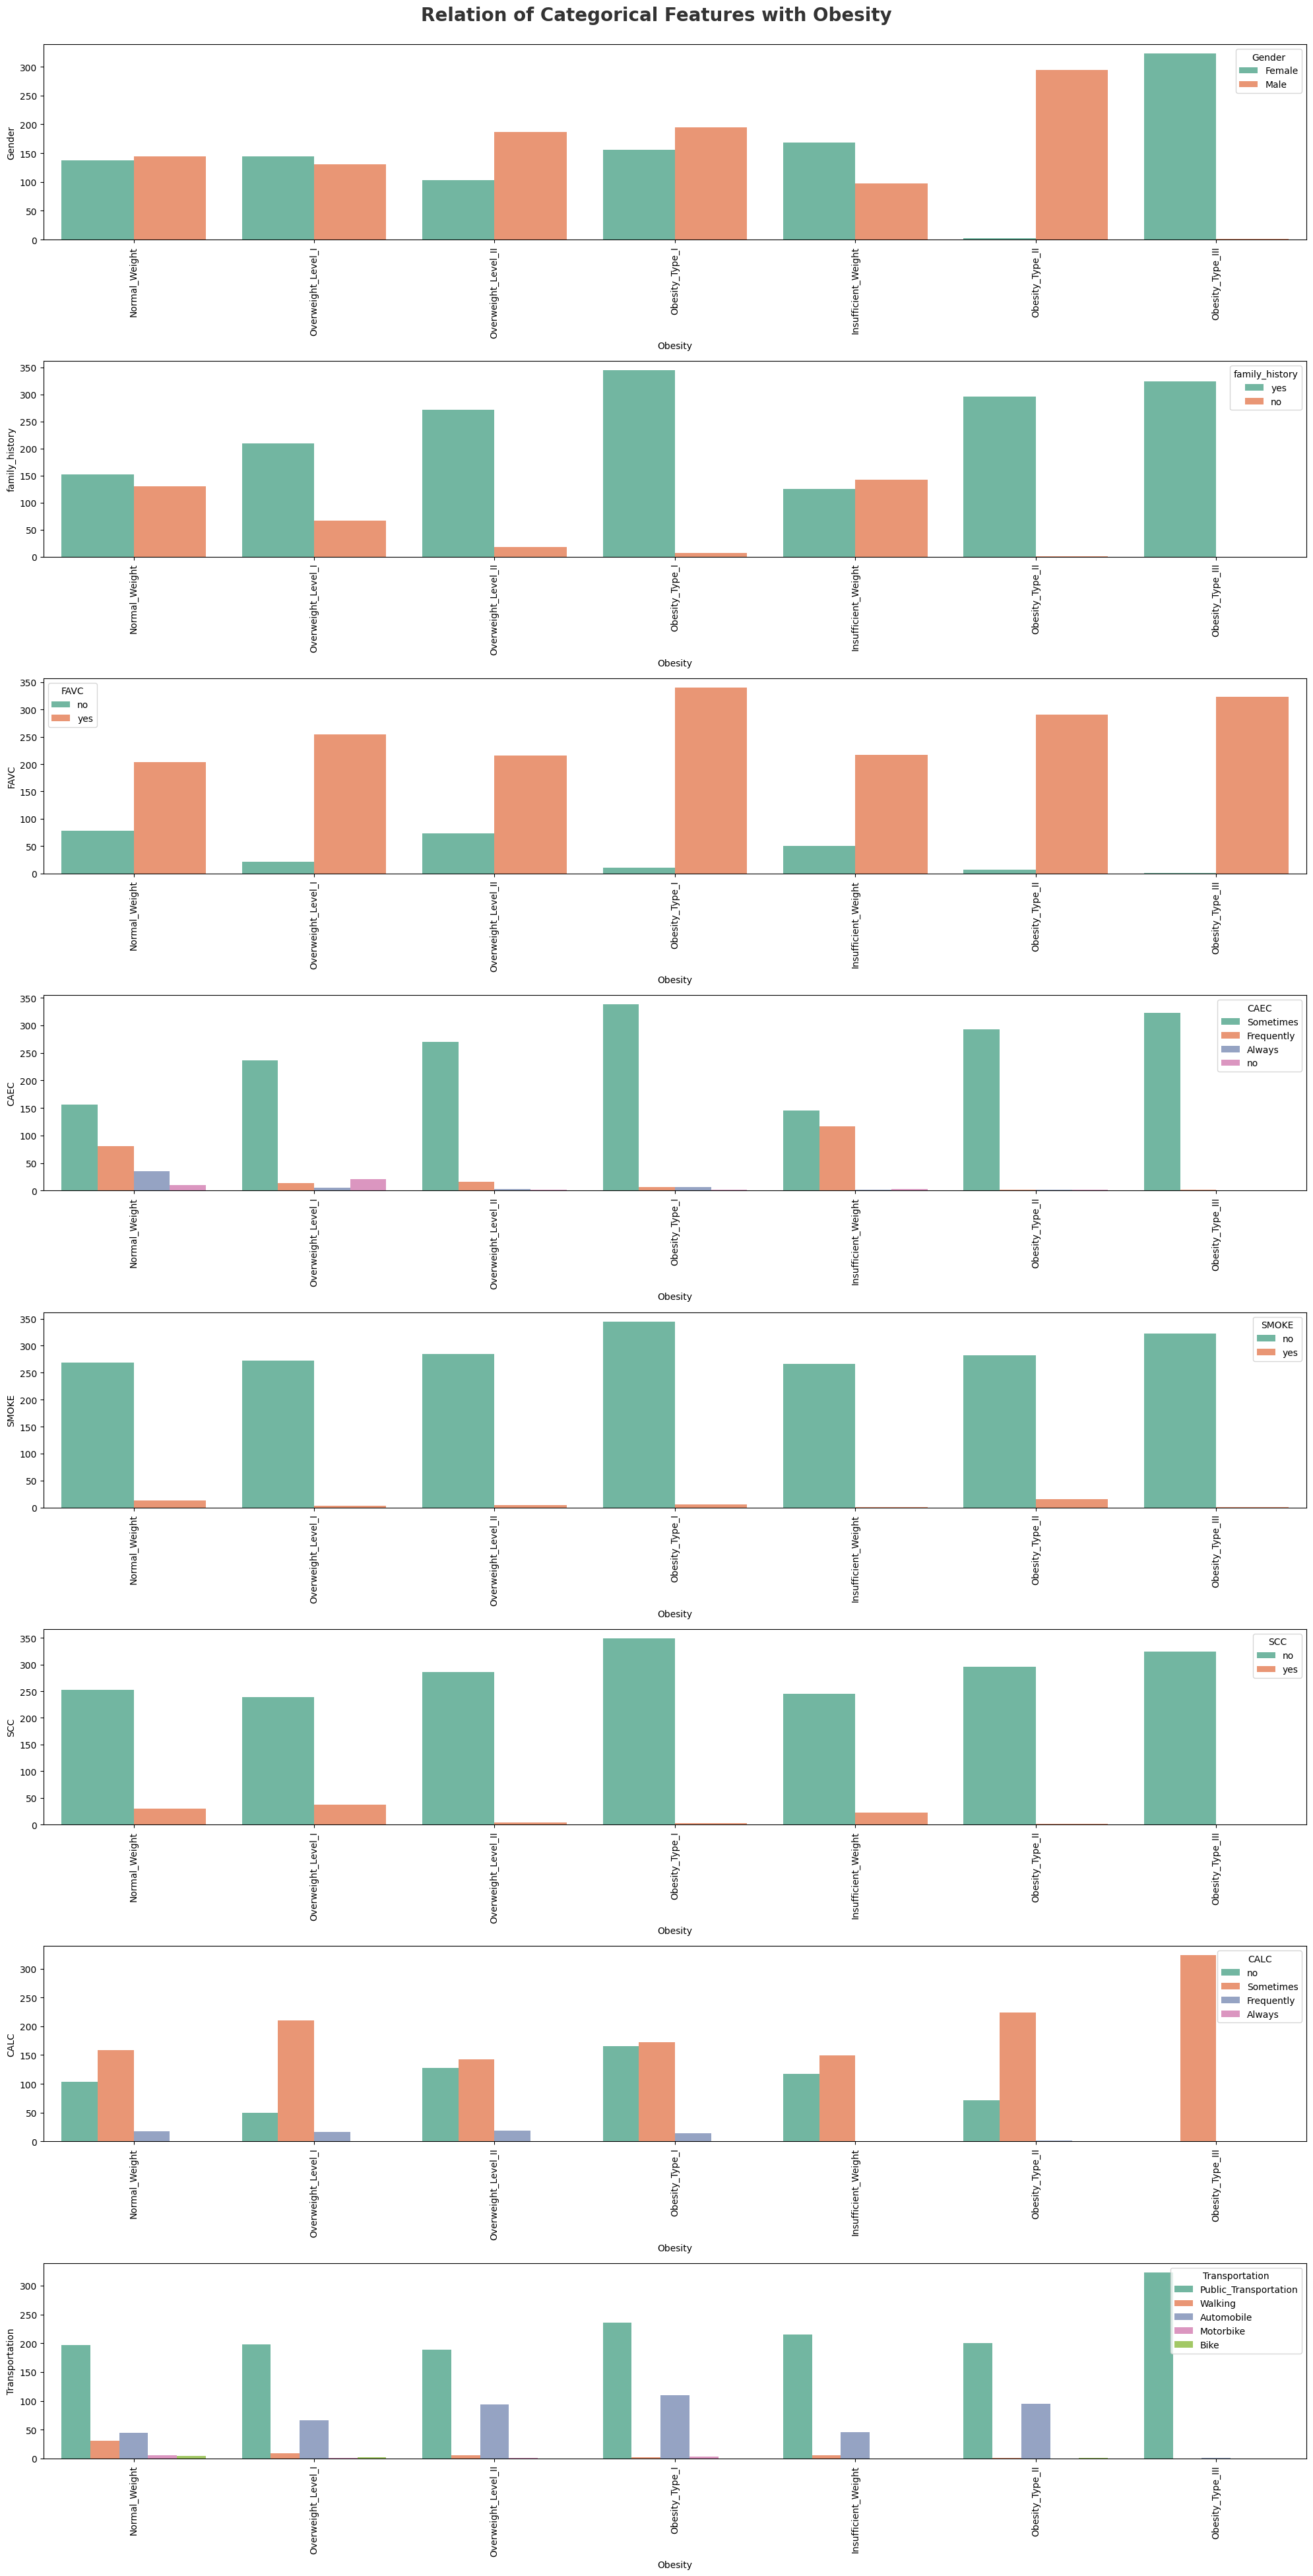

In [25]:
# Bi variate Analysis
plt.figure(figsize=(20, 39))
plt.suptitle('Relation of Categorical Features with Obesity', fontsize=20, fontweight='bold', alpha=0.8, y=1.)
category = ['Gender', 'family_history', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'Transportation']
for i in range(0, len(category)):
    plt.subplot(8, 1, i+1)
    sns.countplot(hue=data[category[i]],palette="Set2",x=data['Obesity'])
    plt.ylabel(category[i])
    plt.xticks(rotation=90)
    plt.tight_layout()

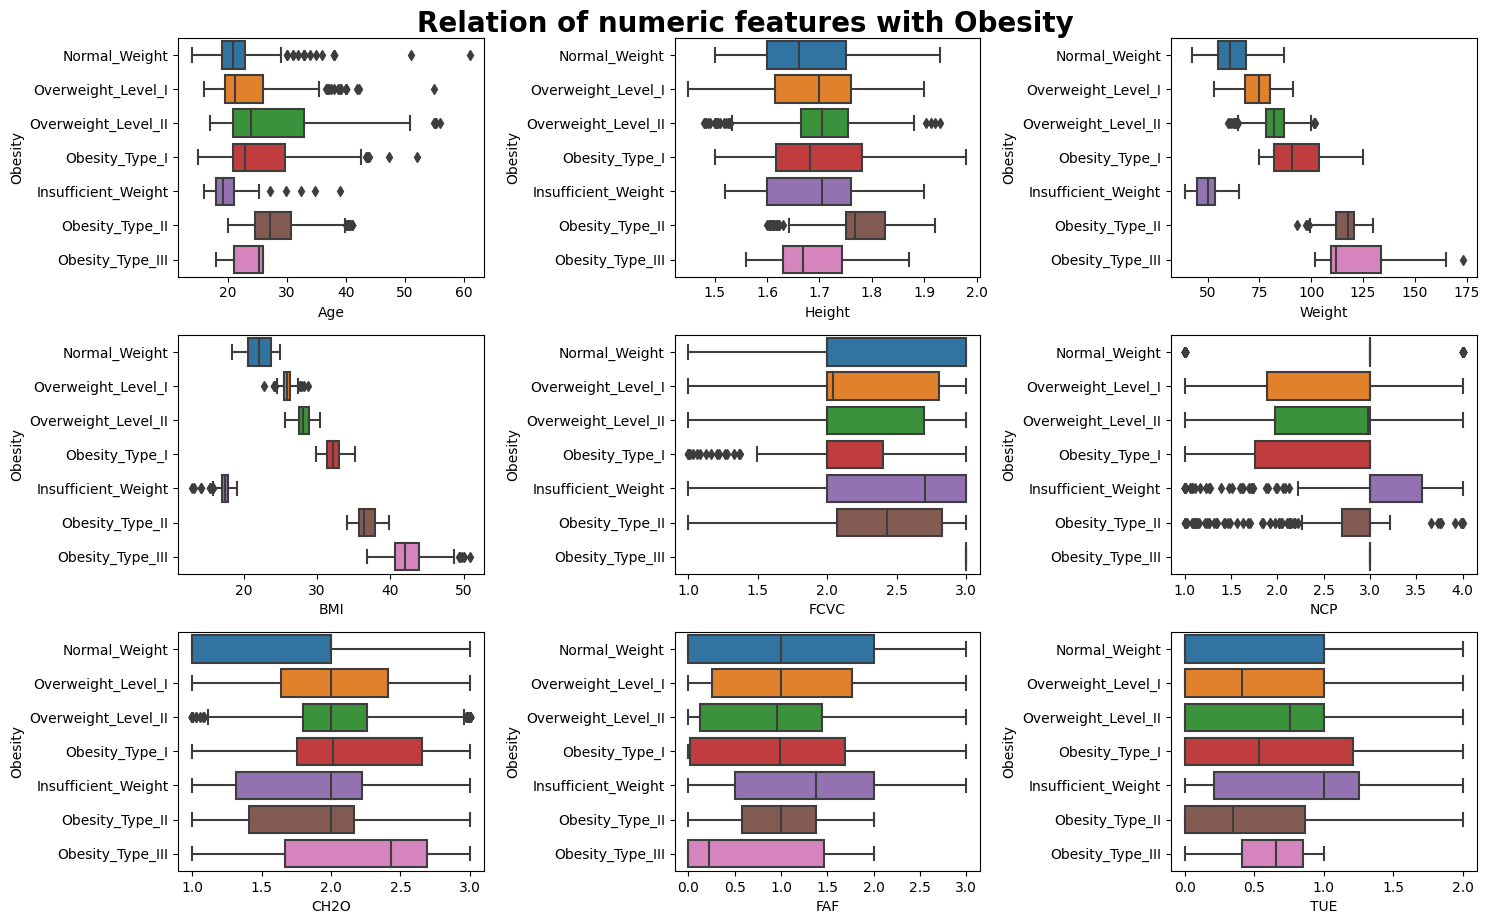

In [26]:
plt.figure(figsize =(15,15))
plt.suptitle('Relation of numeric features with Obesity',fontsize = 20, fontweight='bold')
for i in range (0, len(numeric_features)):
    plt.subplot(5,3,i+1)
    sns.boxplot(y=data['Obesity'],x=data[numeric_features[i]])
    plt.xlabel(numeric_features[i])
    plt.ylabel('Obesity')
    plt.tight_layout()

Text(0.5, 0, 'Weight Category')

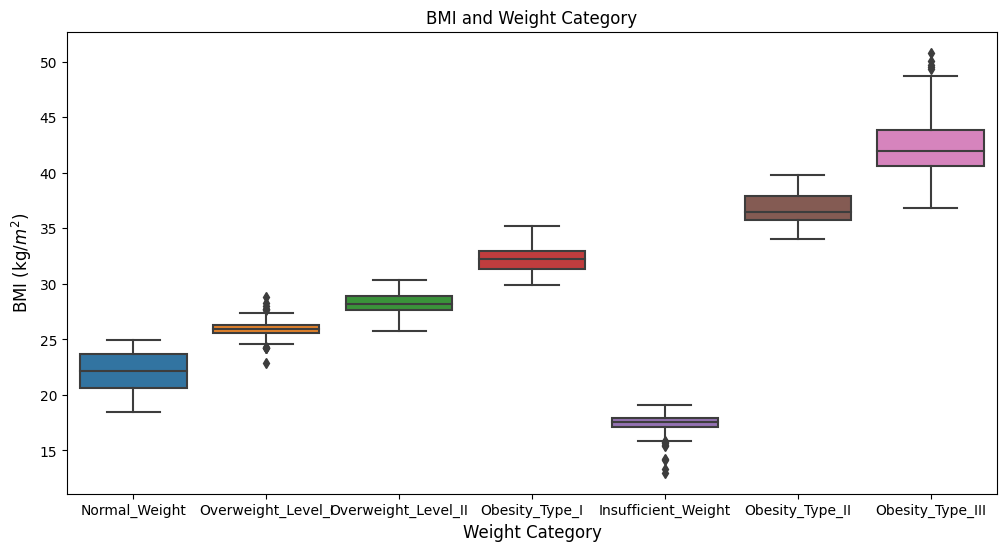

In [27]:
plt.figure(figsize=(12,6))
sns.boxplot(x = data['Obesity'],y = data['BMI']).set_title('BMI and Weight Category')
plt.ylabel("BMI (kg/$m^2$)", size=12)
plt.xlabel("Weight Category", size=12)

<Axes: >

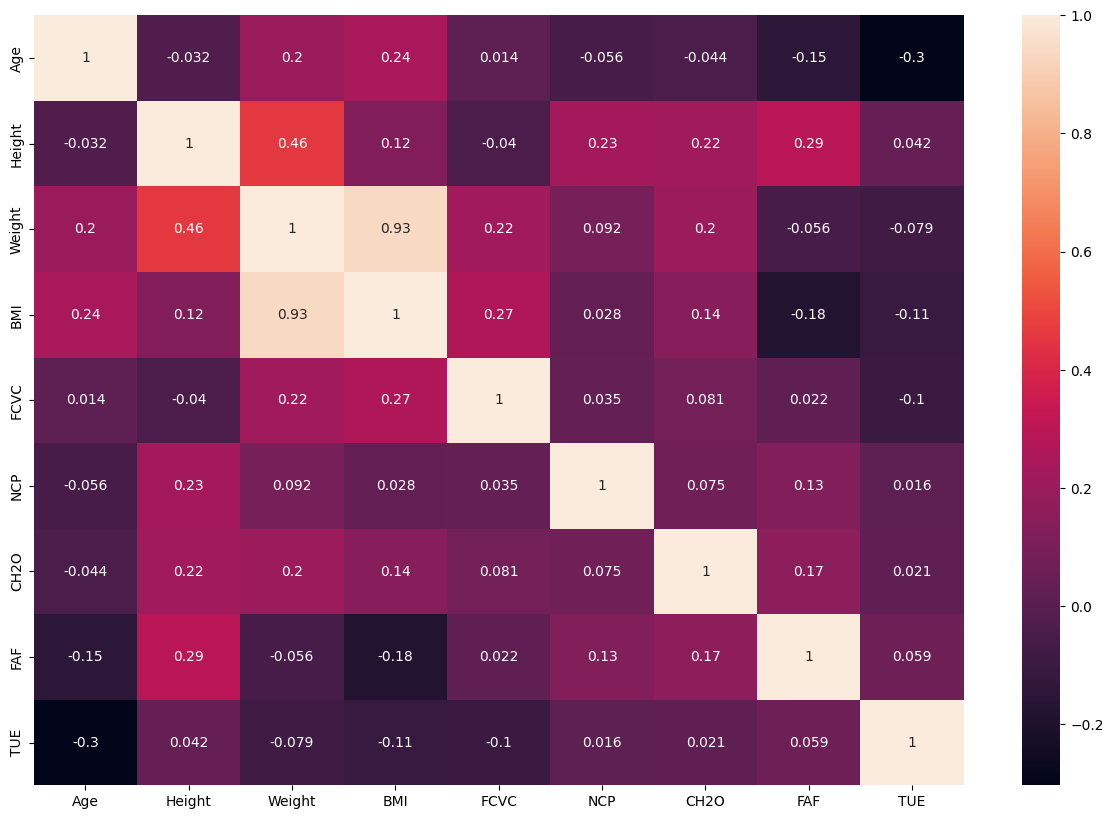

In [30]:
# Correlation between numerical variables using Heatmap
plt.figure(figsize=(15,10))
sns.heatmap(data.corr(), annot = True)

#### As we can see there is strong positive correlation between BMI and weight feature we will drop weight feature from further analysis

In [31]:
# dropping weight column
data.drop(['Weight'],axis=1,inplace=True)

In [32]:
data.columns

Index(['Gender', 'Age', 'Height', 'BMI', 'family_history', 'FAVC', 'FCVC',
       'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE', 'CALC',
       'Transportation', 'Obesity'],
      dtype='object')

In [33]:
# Label Encoding
from sklearn.preprocessing import LabelEncoder

In [34]:
le = LabelEncoder()
for col in data.columns:
    data[col] = le.fit_transform(data[col])

In [35]:
data.head()

,Gender,Age,Height,BMI,family_history,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,Transportation,Obesity
0,0,404,295,453,1,0,170,477,2,0,549,0,0,840,3,3,1
1,0,404,28,441,1,0,809,477,2,1,1267,1,1189,0,2,3,1
2,1,701,1306,419,1,0,170,477,2,0,549,0,1071,840,1,3,1
3,1,1021,1306,723,0,0,809,477,2,0,549,0,1071,0,1,4,5
4,1,578,1202,889,0,0,170,0,2,0,549,0,0,0,2,3,6


In [36]:
# Split the data into X & y
# Independent and Dependent Features
X=data.drop(['Obesity'],axis=1)
y=data['Obesity']

In [41]:
# Train Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size = 0.20, random_state = 42)

In [42]:
X_train.shape , y_train.shape

((1669, 16), (1669,))

In [43]:
X_test.shape, y_test.shape

((418, 16), (418,))

In [44]:
# Standardize or feature scaling the dataset
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [45]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [46]:
# Model Building
# Model 1 : Using Logistic Regression
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
from sklearn.linear_model import LogisticRegression

In [47]:
log_reg = LogisticRegression()
log_reg.fit(X_train,y_train)
y_pred1 = log_reg.predict(X_test)

In [50]:
accuracy = accuracy_score(y_test,y_pred1)
accuracy

0.9114832535885168

In [51]:
# Confusion Matrix
conf_mat = confusion_matrix(y_test,y_pred1)
conf_mat

array([[58,  2,  0,  0,  0,  0,  0],
       [ 6, 53,  0,  0,  0,  7,  0],
       [ 0,  0, 59,  2,  0,  0,  3],
       [ 0,  0,  2, 62,  0,  0,  0],
       [ 0,  0,  0,  0, 61,  0,  0],
       [ 0,  4,  0,  0,  0, 47,  4],
       [ 0,  0,  3,  0,  0,  4, 41]], dtype=int64)

In [52]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

           0       0.91      0.97      0.94        60
           1       0.90      0.80      0.85        66
           2       0.92      0.92      0.92        64
           3       0.97      0.97      0.97        64
           4       1.00      1.00      1.00        61
           5       0.81      0.85      0.83        55
           6       0.85      0.85      0.85        48

    accuracy                           0.91       418
   macro avg       0.91      0.91      0.91       418
weighted avg       0.91      0.91      0.91       418



In [57]:
# Model 2 : Using Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
dt_model=DecisionTreeClassifier()

In [58]:
dt_model.fit(X_train,y_train)

DecisionTreeClassifier()

In [59]:
y_pred_dt = dt_model.predict(X_test)

In [60]:
accuracy = accuracy_score(y_test,y_pred_dt)
accuracy

0.9736842105263158

In [61]:
# Confusion Matrix
conf_mat = confusion_matrix(y_test,y_pred_dt)
conf_mat

array([[60,  0,  0,  0,  0,  0,  0],
       [ 0, 65,  0,  0,  0,  1,  0],
       [ 0,  0, 62,  2,  0,  0,  0],
       [ 0,  0,  3, 61,  0,  0,  0],
       [ 0,  0,  1,  0, 60,  0,  0],
       [ 0,  0,  0,  0,  0, 53,  2],
       [ 0,  0,  0,  0,  0,  2, 46]], dtype=int64)

In [62]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_dt))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        60
           1       1.00      0.98      0.99        66
           2       0.94      0.97      0.95        64
           3       0.97      0.95      0.96        64
           4       1.00      0.98      0.99        61
           5       0.95      0.96      0.95        55
           6       0.96      0.96      0.96        48

    accuracy                           0.97       418
   macro avg       0.97      0.97      0.97       418
weighted avg       0.97      0.97      0.97       418



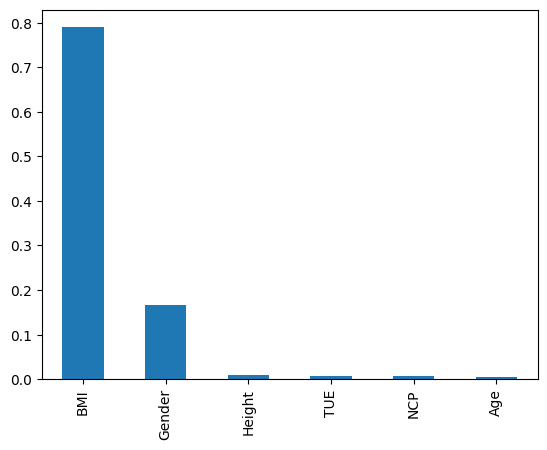

In [67]:
# Feature Importance
feat_importances = pd.Series(dt_model.feature_importances_, index=X.columns)
feat_importances.nlargest(6).plot(kind='bar')
plt.show()

In [68]:
# Model 3: Using Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
Rf_model=RandomForestClassifier()

In [69]:
Rf_model.fit(X_train,y_train)

RandomForestClassifier()

In [70]:
y_pred_rf = Rf_model.predict(X_test)

In [71]:
accuracy = accuracy_score(y_test,y_pred_rf)
accuracy

0.9832535885167464

In [72]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_rf))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        60
           1       0.94      1.00      0.97        66
           2       0.98      1.00      0.99        64
           3       1.00      0.97      0.98        64
           4       0.98      1.00      0.99        61
           5       1.00      0.93      0.96        55
           6       0.98      1.00      0.99        48

    accuracy                           0.98       418
   macro avg       0.98      0.98      0.98       418
weighted avg       0.98      0.98      0.98       418



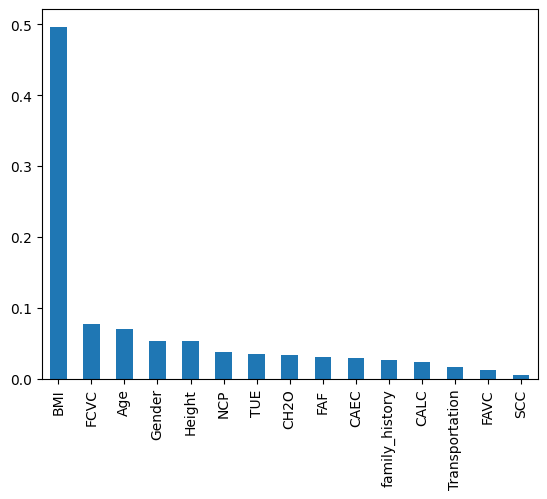

In [80]:
# Feature Importance
feat_importances = pd.Series(Rf_model.feature_importances_, index=X.columns)
feat_importances.nlargest(15).plot(kind='bar')
plt.show()

In [82]:
# Model 4 : Using Support Vector Classifier
from sklearn.svm import SVC

In [83]:
svc=SVC()
svc.fit(X_train,y_train)
y_pred_svc= svc.predict(X_test)

In [84]:
accuracy = accuracy_score(y_test,y_pred_svc)
accuracy

0.9019138755980861

In [85]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_svc))

              precision    recall  f1-score   support

           0       0.93      0.87      0.90        60
           1       0.70      0.82      0.76        66
           2       0.94      0.94      0.94        64
           3       1.00      0.97      0.98        64
           4       1.00      0.98      0.99        61
           5       0.84      0.84      0.84        55
           6       0.98      0.90      0.93        48

    accuracy                           0.90       418
   macro avg       0.91      0.90      0.91       418
weighted avg       0.91      0.90      0.90       418



In [87]:
# Comparing predicted values for all models
df2 = pd.DataFrame({'Actual':y_test,'Logistic':y_pred1,'DT':y_pred_dt,'RF':y_pred_rf,'SVC':y_pred_svc})
df2.head(15)

,Actual,Logistic,DT,RF,SVC
1337,2,2,2,2,2
1763,3,3,3,3,3
391,0,0,0,0,0
597,0,0,0,0,0
1735,3,3,3,3,3
901,5,5,5,5,5
244,1,1,1,1,1
1847,4,4,4,4,4
626,0,0,0,0,0
51,1,1,1,1,1


In [88]:
results = {'Logistic':accuracy_score(y_test,y_pred1)*100,'DT':accuracy_score(y_test,y_pred_dt)*100,'RF':accuracy_score(y_test,y_pred_rf)*100,
          'SVC':accuracy_score(y_test,y_pred_svc)*100}

In [89]:
results=pd.DataFrame(results,index=[0])

In [90]:
results

,Logistic,DT,RF,SVC
0,91.148325,97.368421,98.325359,90.191388
